In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

import numpy as np

In [2]:
states = ['tiger-left', 'tiger-right']
actions = ['listen', 'open-left', 'open-right']
observations = ['tiger-left', 'tiger-right']

In [3]:
# Action: listen
listen_transitions = [[1,0],
                      [0,1]]
# Action: open-left or open-right
open_transitions = [[0.5,0.5],
                    [0.5,0.5]]

transition_table = np.zeros((len(states), len(actions), len(observations)))
for i,_ in enumerate(states):
    for j,_ in enumerate(actions):
        action_t = listen_transitions if j == 0 else open_transitions
        for k,_ in enumerate(observations):
            transition_table[i,j,k] = action_t[i][k]

transition_table

array([[[1. , 0. ],
        [0.5, 0.5],
        [0.5, 0.5]],

       [[0. , 1. ],
        [0.5, 0.5],
        [0.5, 0.5]]])

In [4]:
reward_table = np.zeros((len(states),len(actions), len(states)))
for i,_ in enumerate(states):
    for j,_ in enumerate(actions):
        if j == 0: # Listen
            reward_table[i,j] = -1
        else: # Open
            reward_table[i,j,:] = -100 if i == j-1 else 10 # If tiger in door opened, -100 else, won with 10

reward_table

array([[[  -1.,   -1.],
        [-100., -100.],
        [  10.,   10.]],

       [[  -1.,   -1.],
        [  10.,   10.],
        [-100., -100.]]])

In [5]:
observation_table = np.zeros((len(states), len(actions), len(observations)))

for i,_ in enumerate(states):
    for k,_ in enumerate(observations):
        observation_table[i,0,k] = (0.85 if i == k else 0.15)

        for a in [1,2]:
            observation_table[i,a,k] = 0.5

In [6]:
model = Model(states=states,
              actions=actions,
              observations=observations, 
              transitions=transition_table,
              rewards=reward_table,
              observation_table=observation_table)

In [7]:
solver = PBVI_Solver(0.95)
solution, solve_history = solver.solve(model,8,20)

<Figure size 700x500 with 0 Axes>

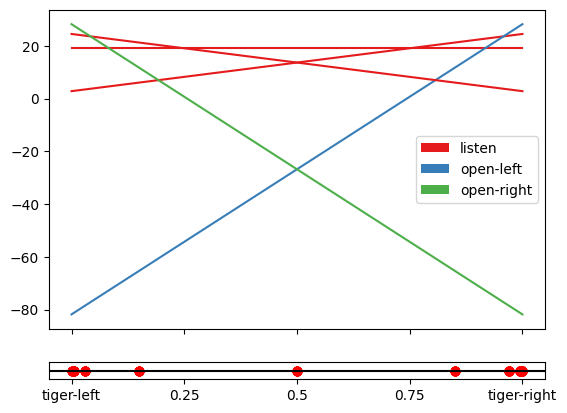

In [8]:
solve_history.plot_solution()

We can see it is right from the following solved problem with the same parameters: https://pomdp.org/code/index.html

In [9]:
# solve_history.save_history_video('tiger_problem')

## Simulation

In [9]:
agent = Agent(model)
agent.train(solver,8,20)

In [10]:
sim = Simulation(model, done_on_action=[1,2])
rewards = agent.run_n_simulations(sim, 1000)

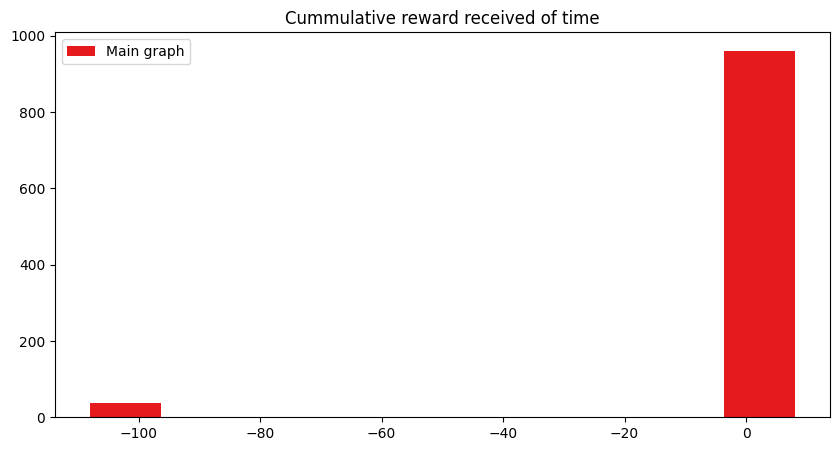

In [11]:
rewards.plot('histogram')

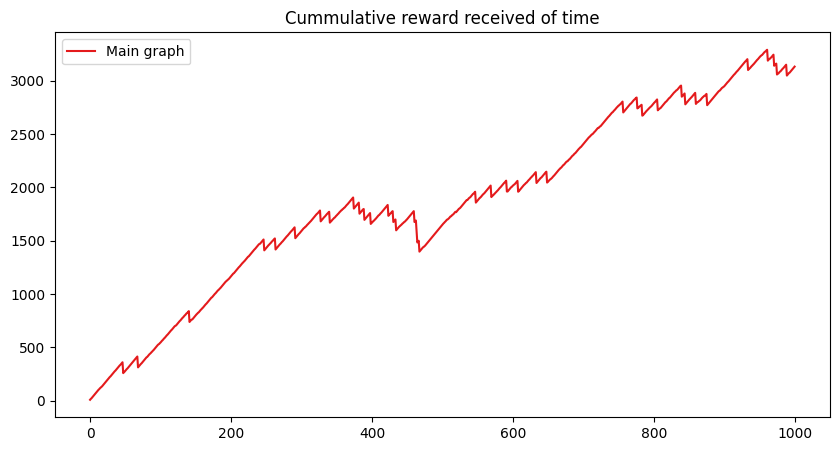

In [12]:
rewards.plot('total')